In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix ,confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv("data.csv")
df.head()
df.iloc[0]

age         40.0
sex          1.0
cp           2.0
rbp        140.0
chol       289.0
fbs          0.0
recg         0.0
thalach    172.0
exang        0.0
oldpeak      0.0
slope        1.0
target       0.0
Name: 0, dtype: float64

In [3]:
df.head()

,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:

Xn = df[['age','sex','cp','rbp','chol','fbs','recg','thalach','exang','oldpeak','slope']]
scaler = StandardScaler()
X = scaler.fit_transform(Xn)
Y = df.target


In [5]:
No = Y.unique()
print("Unique",No)
Y_total = Y.count()
Y_true = Y.sum()

Y_false = Y_total - Y_true
print("Positive Value = ", Y_true,", i.e :",round((Y_true/Y_total)*100,2),"%")
print("False Value = ", Y_false,", i.e :",100-round((Y_true/Y_total)*100,2),"%")


Unique [0 1]
Positive Value =  629 , i.e : 52.86 %
False Value =  561 , i.e : 47.14 %


In [6]:
print("Description of Dataset")
df.describe()

Description of Dataset


,age,sex,cp,rbp,chol,fbs,recg,thalach,exang,oldpeak,slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
totalAccuracy = []
totalPrecision = []
totalRecall = []
totalFscore = []

In [80]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.907583 using {'max_features': 'sqrt', 'n_estimators': 1000}


In [8]:
model_RFC = RandomForestClassifier(n_estimators=1000,max_features='log2',criterion='gini')

model_RFC.fit(X_train,Y_train)
accuracy_RF = model_RFC.score(X_test,Y_test)

print('Accuracy: ',model_RFC.accuracy_RF*100)
Y_pred = model_RFC.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionRF = precision_score(Y_test,Y_pred)
recallRF = recall_score(Y_test,Y_pred)
fScoreRF = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_RF)
totalPrecision.append(precisionRF)
totalRecall.append(recallRF)
totalFscore.append(fScoreRF)

print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))

print("Confusion Matrix: \n",conMatrix)


Accuracy:  91.03641456582633
Precsion:  88.35
Recall:  95.79
F Score:  91.92
Confusion Matrix: 
 [[143  24]
 [  8 182]]


Precsion:  88.73
Recall:  96.28
F Score:  92.35


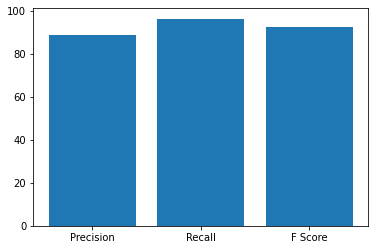

In [82]:
print("Precsion: ",round(precisionRF*100,2))
print("Recall: ",round(recallRF*100,2))
print("F Score: ",round(fScoreRF*100,2))
y_label = [precisionRF*100,recallRF*100,fScoreRF*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

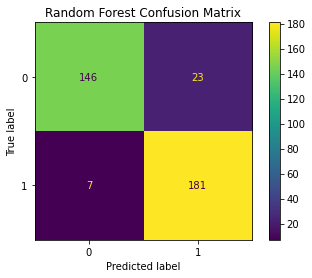

In [83]:
plot_confusion_matrix(model_RFC, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [84]:
model = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.906364 using {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}


In [85]:


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

model_KNN = KNeighborsClassifier(metric='manhattan',n_neighbors=13,weights='distance',n_jobs=-1)

model_KNN.fit(X_train,Y_train)
accuracy_KNN = model_KNN.score(X_test,Y_test)
print('Accuracy: ',accuracy_KNN*100,"\n")
Y_pred = model_KNN.predict(X_test)

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionKNN = precision_score(Y_test,Y_pred)
recallKNN = recall_score(Y_test,Y_pred)
fScoreKNN = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_KNN)
totalPrecision.append(precisionKNN)
totalRecall.append(recallKNN)
totalFscore.append(fScoreKNN)

print("Precsion: ",round(precisionKNN*100,2))
print("Recall: ",round(recallKNN*100,2))
print("F Score: ",round(fScoreKNN*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  93.27731092436974 

Precsion:  91.71
Recall:  95.68
F Score:  93.65
Confusion Matrix: 
 [[156  16]
 [  8 177]]


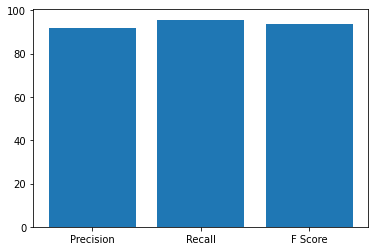

In [86]:

y_label = [precisionKNN*100,recallKNN*100,fScoreKNN*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

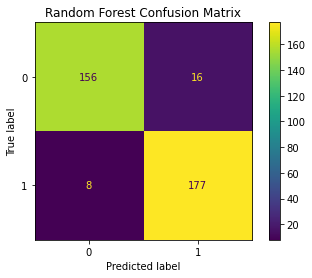

In [87]:

plot_confusion_matrix(model_KNN, X_test, Y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [88]:

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=1)
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     verbose=1, 
                     cv=cv,
                     scoring='accuracy')


gs_NB.fit(X_train,Y_train)
print("Best: %f using %s" % (gs_NB.best_score_, gs_NB.best_params_))

Fitting 40 folds for each of 100 candidates, totalling 4000 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.838228 using {'var_smoothing': 0.43287612810830584}
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:    7.5s finished


In [89]:

model_GNB = GaussianNB(var_smoothing=0.15199110829529336)
model_GNB.fit(X_train, Y_train)

Y_pred = model_GNB.predict(X_test)
accuracy_GNB = model_GNB.score(X_test,Y_test)
print('Accuracy: ',accuracy_GNB*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGNB = precision_score(Y_test,Y_pred)
recallGNB = recall_score(Y_test,Y_pred)
fScoreGNB = f1_score(Y_test,Y_pred)

totalAccuracy.append(accuracy_GNB)
totalPrecision.append(precisionGNB)
totalRecall.append(recallGNB)
totalFscore.append(fScoreGNB)

print("Precsion: ",round(precisionGNB*100,2))
print("Recall: ",round(recallGNB*100,2))
print("F Score: ",round(fScoreGNB*100,2))

print("Confusion Matrix: \n",conMatrix)

Accuracy:  83.75350140056022 

Precsion:  85.88
Recall:  82.16
F Score:  83.98
Confusion Matrix: 
 [[147  25]
 [ 33 152]]


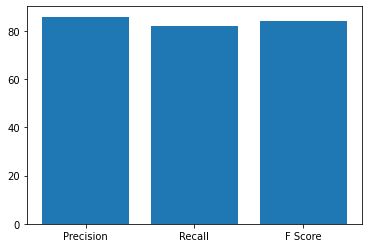

In [90]:
y_label = [precisionGNB*100,recallGNB*100,fScoreGNB*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

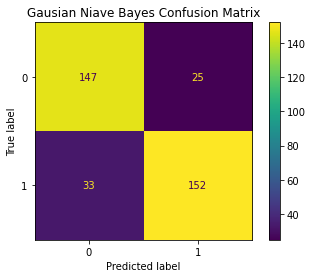

In [91]:
plot_confusion_matrix(model_GNB, X_test, Y_test)
plt.title("Gausian Niave Bayes Confusion Matrix")
plt.show()

In [92]:

df_classifier = DecisionTreeClassifier()

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3,4,5,6]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train,Y_train)
# df_classifier.score(X_test,Y_test)
print("Best: %f using %s" % (gs_DT.best_score_, gs_DT.best_params_))

Fitting 10 folds for each of 80 candidates, totalling 800 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
Best: 0.866738 using {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    2.6s finished


In [93]:

model_DTC = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=3)
model_DTC.fit(X_train, Y_train)

Y_pred = model_DTC.predict(X_test)
accuracy_DTC = model_DTC.score(X_test,Y_test)
print('Accuracy: ',accuracy_DTC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionDTC = precision_score(Y_test,Y_pred)
recallDTC = recall_score(Y_test,Y_pred)
fScoreDTC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionDTC*100,2))
print("Recall: ",round(recallDTC*100,2))
print("F Score: ",round(fScoreDTC*100,2))

totalAccuracy.append(accuracy_DTC)
totalPrecision.append(precisionDTC)
totalRecall.append(recallDTC)
totalFscore.append(fScoreDTC)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  84.87394957983193 

Precsion:  83.59
Recall:  88.11
F Score:  85.79
Confusion Matrix: 
 [[140  32]
 [ 22 163]]


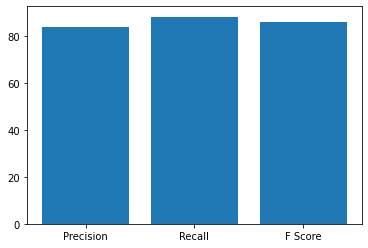

In [94]:

y_label = [precisionDTC*100,recallDTC*100,fScoreDTC*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

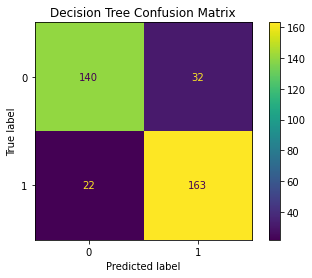

In [95]:
plot_confusion_matrix(model_DTC, X_test, Y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [96]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=4, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.826604 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [97]:

model_LR = LogisticRegression(C=100,penalty='l2',solver='liblinear')
model_LR.fit(X_train, Y_train)

Y_pred = model_LR.predict(X_test)
accuracy_LR = model_LR.score(X_test,Y_test)
print('Accuracy: ',accuracy_LR*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionLR = precision_score(Y_test,Y_pred)
recallLR = recall_score(Y_test,Y_pred)
fScoreLR = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionLR*100,2))
print("Recall: ",round(recallLR*100,2))
print("F Score: ",round(fScoreLR*100,2))


totalAccuracy.append(accuracy_LR)
totalPrecision.append(precisionLR)
totalRecall.append(recallLR)
totalFscore.append(fScoreLR)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  83.4733893557423 

Precsion:  83.87
Recall:  84.32
F Score:  84.1
Confusion Matrix: 
 [[142  30]
 [ 29 156]]


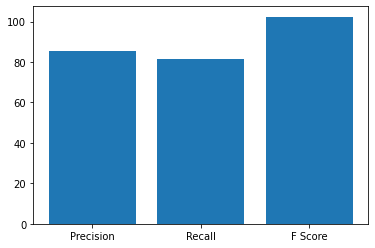

In [100]:
y_label = [precisionLR*100,recallLR*100,fScoreLR*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

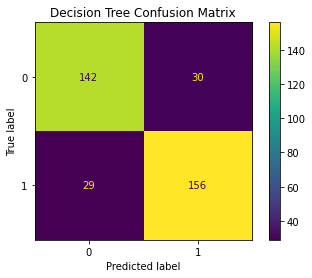

In [101]:
plot_confusion_matrix(model_LR, X_test, Y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [13]:
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.880771 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [14]:
model_SVC = SVC(C=10,gamma='scale',kernel='rbf')
model_SVC.fit(X_train,Y_train)

Y_pred = model_SVC.predict(X_test)

accuracy_SVC = model_SVC.score(X_test,Y_test)
print('Accuracy: ',accuracy_SVC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionSVC = precision_score(Y_test,Y_pred)
recallSVC = recall_score(Y_test,Y_pred)
fScoreSVC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionSVC*100,2))
print("Recall: ",round(recallSVC*100,2))
print("F Score: ",round(fScoreSVC*100,2))

totalAccuracy.append(accuracy_SVC)
totalPrecision.append(precisionSVC)
totalRecall.append(recallSVC)
totalFscore.append(fScoreSVC)

print("Confusion Matrix: \n",conMatrix)

Accuracy:  86.83473389355743 

Precsion:  87.05
Recall:  88.42
F Score:  87.73
Confusion Matrix: 
 [[142  25]
 [ 22 168]]


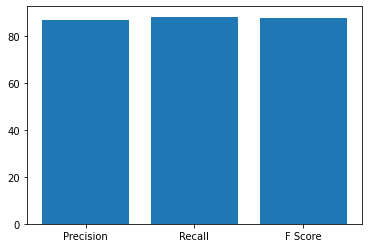

In [16]:
y_label = [precisionSVC*100,recallSVC*100,fScoreSVC*100]
x_label = ['Precision','Recall','F Score']

plt.bar(x_label,y_label)
plt.show()

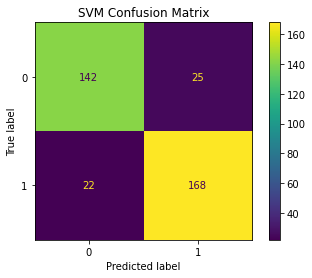

In [18]:
plot_confusion_matrix(model_SVC, X_test, Y_test)
plt.title("SVM Confusion Matrix")
plt.show()

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Accuracy:  89.07563025210085 

Precsion:  88.72
Recall:  91.05
F Score:  89.87
Confusion Matrix: 
 [[145  22]
 [ 17 173]]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train,Y_train)

Y_pred = model_GBC.predict(X_test)
print('Accuracy: ',model_GBC.score(X_test,Y_test)*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGBC = precision_score(Y_test,Y_pred)
recallGBC = recall_score(Y_test,Y_pred)
fScoreGBC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionGBC*100,2))
print("Recall: ",round(recallGBC*100,2))
print("F Score: ",round(fScoreGBC*100,2))

print("Confusion Matrix: \n",conMatrix)

Best: 0.898824 using {'n_estimators': 1000}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train,Y_train)

Y_pred = model_GBC.predict(X_test)
accuracy_GBC = model_GBC.score(X_test,Y_test)
print('Accuracy: ',accuracy_GBC*100,"\n")

conMatrix = confusion_matrix(Y_test,Y_pred)
precisionGBC = precision_score(Y_test,Y_pred)
recallGBC = recall_score(Y_test,Y_pred)
fScoreGBC = f1_score(Y_test,Y_pred)

print("Precsion: ",round(precisionGBC*100,2))
print("Recall: ",round(recallGBC*100,2))
print("F Score: ",round(fScoreGBC*100,2))

totalAccuracy.append(accuracy_GBC)
totalPrecision.append(precisionGBC)
totalRecall.append(recallGBC)
totalFscore.append(fScoreGBC)

print("Confusion Matrix: \n",conMatrix)